## Term Project - Biswajit Sharma

### Prediction of Obesity risk based on eating habits and physical activity

### Term Project Milestone 1

#### Introduction

Obesity is a medical condition that is related to the excessive accumulation of body fat. It is not only a cosmetic concern but rather a medical problem that increases the risk of other health problems and diseases like heart diseases, diabetes, high cholesterol, high blood pressure, liver disease, musculoskeletal disorders, and certain cancers. Since 1997, WHO has considered obesity a global epidemic and a significant health problem. To prevent obesity, various organizations, including government and non-government, are promoting campaigns regarding two main risk factors: eating habits and physical activity (Gozukara et al., 2023).

Although it is known that excessive intake of calories can cause obesity, nutritional factors like low-quality diet, unbalanced diet, processed foods, and alcohol consumption can also increase the risk of obesity. Physical activity has also been very influential in controlling or preventing obesity.  The frequency, duration, and intensity of physical activity and exercises play an essential role in the effective prevention and reduction of obesity (Gozukara et al., 2023). Eating healthy and nutrituous food helps in managing proper body weight and preventing obesity. Therefore, it becomes important to invest resources in investigating the relationship of obesity with eating habits and physical activity. 

Healthcare plans can perform data mining and build a model to predict the early detection of obesity risk for their members, which can yield enormous benefits for both health plans and their members. Early detection of obesity risk helps individuals to be aware of the risk and take preventive measures so that they do not develop obesity related health conditions and diseases in the later stages of their life. It also helps health plans to intervene and incentivize members to motivate them in practicing obesity management such as healthy eating habits, exercises, and increased physical activity. This reduces the number of related health claims caused by obesity related diseases and essentially allows health plans to reduce the cost of care, enhance competitiveness and generate more revenue.

This study will generate and evaluate a model to _predict obesity risk based on eating habits and physical activity_

#### Dataset

_[UC Irvine Machine Learning Repository - Obesity levels, Eating Having and Physical activity dataset.][1]_

This dataset include data about eating habits, physical activity, weight, height and obesity levels of individuals from the countries of mexico, Peru and Columbia. The data includes the eating habits and physical activity levels of 498 participants aged between 14 and 61 years (UCI. 2019).

The originally collected data was preprocessed, such as the removal of missing values, and normalization was performed. It was also balanced to reduce the skewness of the obesity levels. 23% of the source data is actual responses collected over a 30-day survey, while the remaining 77% was synthetically generated using SMOTE (Palechor & de la Hoz Manotas, 2019).

There are 17 variables in the dataset.

 - Gender - male or female
 - Age - age in years
 - Height - height in meters
 - Weight - weight in kgs
 - Family History of overweight - yes or no
 - Frequently consume high caloric food (FAVC) - yes or no
 - Consumption of vegetables in meals (FCVC) - yes or no
 - Number of main meals (NCP) - 1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer
 - Consumption of food between meals (CAEC) - no, sometimes, frequently, or always
 - Daily consumption of water (CH20) - 1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L
 - Consumption of alcohol (CALC) - no, sometimes, frequently or always
 - Calorie consumption monitoring done (SCC) - yes or no
 - Frequency of Physical activity (FAF) - 1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week
 - Use of electronic devices (TUE) - 0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours
 - Mode of transportation used (MTRANS) - automobile, motorbike, bike, public transportation, walking
 - Obesity Level - the obesity level of the individual

Obesity level is labelled in the source data with classes as given below. 

 - Insufficient Weight 
 - Normal Weight
 - Overweight I
 - Overweight II
 - Obesity I
 - Obesity II
 - Obesity III

[1]: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#### Analysis

In [52]:
# import required modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# read dataset into pandas dataframe
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [54]:
# view few rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [55]:
#convert all column names to lower case for consistent case
col_names = {cols: cols.lower()
 for cols in df.columns
}

df = df.rename(columns=col_names)

In [56]:
# view few rows
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [57]:
#check dimensions of dataset
df.shape

(2111, 17)

In [58]:
# define numerical features, categorical features and target

numerical_features = ["age", "fcvc", "ncp", "ch2o","faf", "tue","height","weight"]
categorical_features = ["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans"]
target = "nobeyesdad"

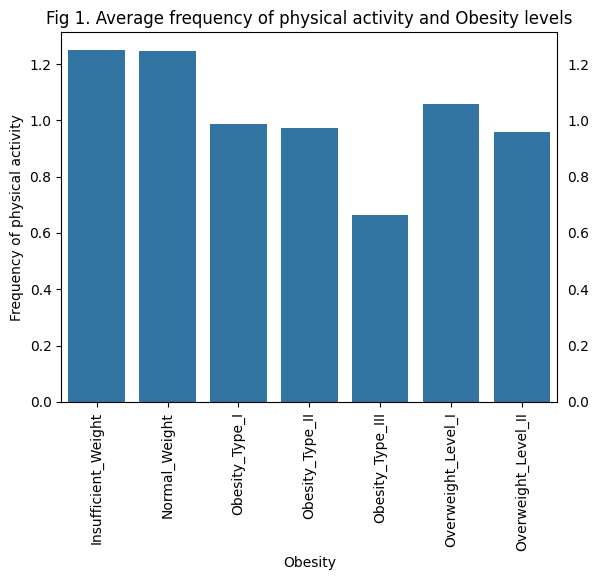

In [59]:
#get average frequency of physical activity for each obesity levels 
grouped = df[["nobeyesdad","faf"]].groupby("nobeyesdad").mean()

# plot to view frequency of physical activity relationship with obesity levels 
sns.barplot(data=grouped, x="nobeyesdad", y="faf")
plt.tick_params(labelright=True)
plt.title("Fig 1. Average frequency of physical activity and Obesity levels")
plt.ylabel("Frequency of physical activity")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

Fig 1 shows that the average frequency of physical activity among obese and overweight people is lower than those who are normal weight or underweight. This may indicate the presence of a relationship between obesity and the frequency of physical activity.

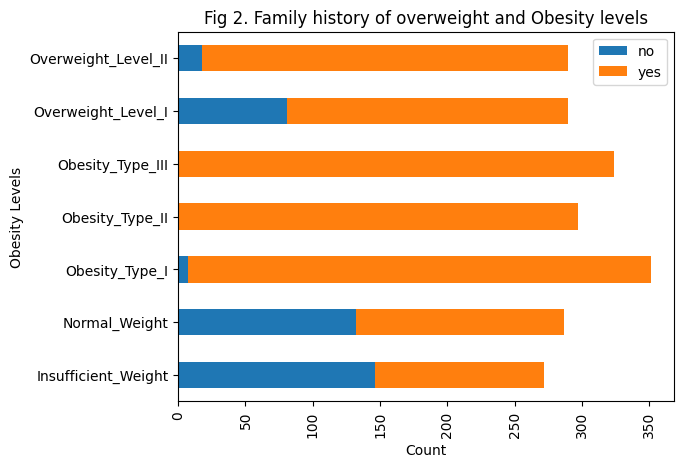

In [60]:
#get counts of observations for each obesity levels based on whether having a family history of overweight
grouped = df.groupby(["nobeyesdad","family_history_with_overweight"]).count()["age"].unstack()

# plot to view family history of overweight relationship with obesity levels
grouped.plot(kind='barh', stacked=True)
# sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="family_history_with_overweight")
plt.title("Fig 2. Family history of overweight and Obesity levels")
plt.xlabel("Count")
plt.ylabel("Obesity Levels")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

Fig 2 shows that most of the obese and overweight people have a family history of overweight. This indicates that family history may play a vital role in increasing the risk of obesity, which may be due to genetic factors.

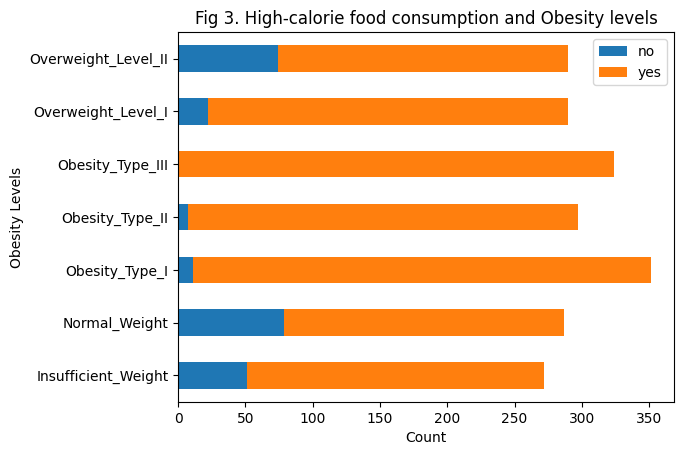

In [61]:
#get counts of observations for each obesity levels based on consumption of high-calorie food consumption
grouped = df.groupby(["nobeyesdad","favc"]).count()["age"].unstack()

# create plot to visualize high-calorie food consumption relationship with various obesity levels
grouped.plot(kind='barh', stacked=True)
plt.title("Fig 3. High-calorie food consumption and Obesity levels")
plt.xlabel("Count")
plt.ylabel("Obesity Levels")
plt.legend(loc="best")
plt.show()

Fig 3 shows that the majority of the obese people frequenly consume frequently high-calorie food. This indicates a potential presence of a relationship between obesity and frequent consumption of high-calorie foods.

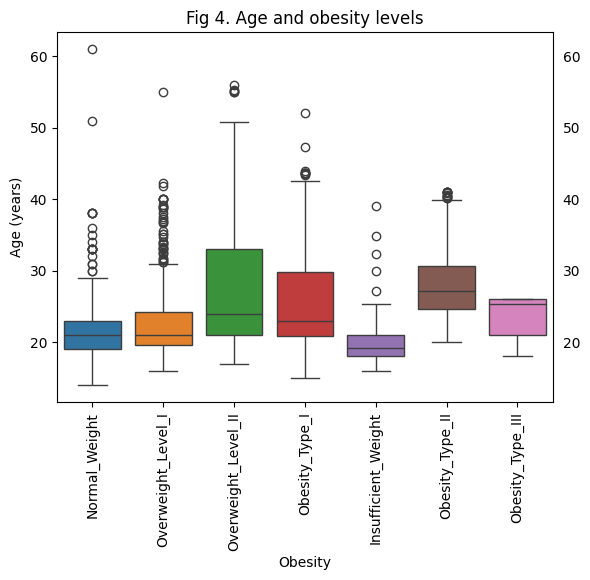

In [62]:
# plot to view relationship of age with obesity levels
sns.boxplot(x=df["nobeyesdad"], y=df["age"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 4. Age and obesity levels")
plt.ylabel("Age (years)")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

Fig 4 shows that age may also be important in increasing the obesity risk. The boxplots show that the median age of obese and overweight people is higher than that of those who are underweight or normal weight. It appears that as people become older, their risk of obesity also increases.

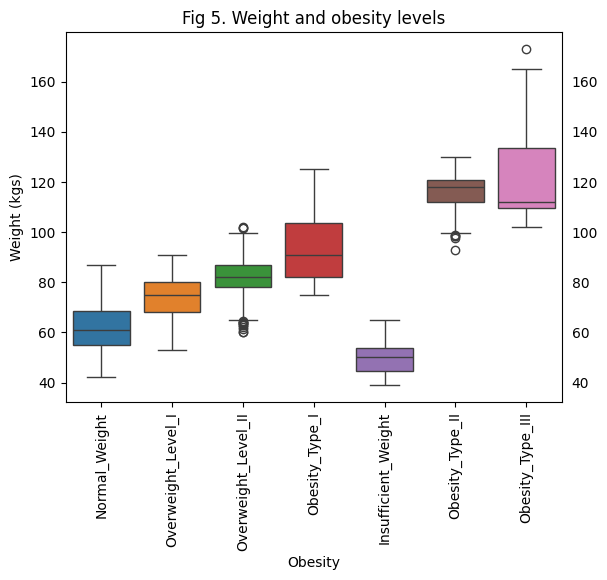

In [63]:
# plot to view relationship of weight with obesity levels
sns.boxplot(x=df["nobeyesdad"], y=df["weight"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 5. Weight and obesity levels")
plt.ylabel("Weight (kgs)")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

We already know that weight is one of the most important factors that contribute to obesity. Fig 5 also aligns with this understanding and shows that people with obesity have much higher weight than those are with normal weight. We see that the median weight for type II and type III obesity levels are much higher than that of normal weight and overweight.

#### Summary

From the above plots, we observe that there is a relationship between eating habits, physical activity and obesity. We noticed that the majority of the obese people frequently consume high-calorifie foods and perform lower physical activity. Family history may also play a vital role in increasing the risk of obesity because we see that most obese and overweight people have a family history of overweight. We also observed that obese and overweight people are generally older, and therefore, obesity risk may also increase with age. Therefore, eating habits, physical activity, family history, age and body weight appear to be significant factors in predicting obesity levels for an individual.

### Term Project Milestone 2

#### Data Preparation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Check for Imbalance in target classes

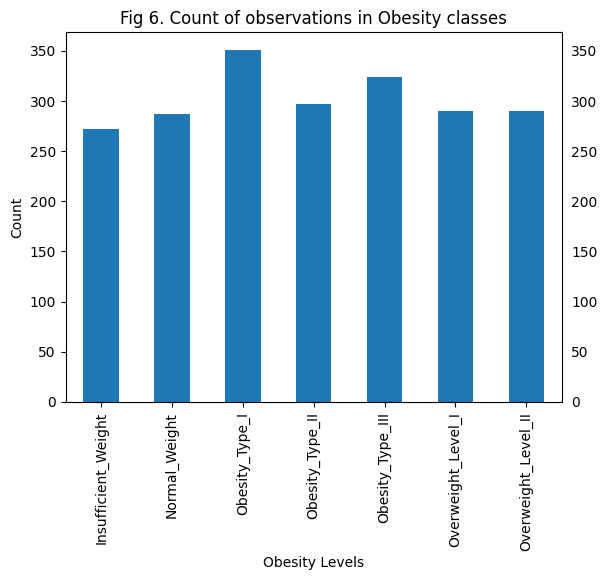

In [65]:
# check the count of classes in target
grouped = df.groupby("nobeyesdad").count()["gender"]
grouped.plot(kind="bar")
plt.tick_params(labelright=True)
plt.title("Fig 6. Count of observations in Obesity classes")
plt.ylabel("Count")
plt.xlabel("Obesity Levels")
plt.xticks(rotation=90)
plt.show()

From above plot we do not see any significant imbalance among the target classes.

Check for missing values

In [66]:
df.isna().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

From above, we do not notice any missing values in the dataset.

###### It is better to transform categories to _oridinal_ values if there is an order in case of Categorical feaures.

###### Categories in `consumption of food between meals` have some natural order. Based on the nature of this study, _no consumption of food between meals_ has a lower order than _frequent consumption of food between meals_, because _frequent consumption of food between meals_ can cause intake of more calories than our body needs and increase the obesity risk.

In [67]:
# change Consumption of food between meals to ordinal value
df["caec"] = df["caec"].replace(
    {
        "no": 0,
        "Sometimes": 1,
        "Frequently": 2,
        "Always": 3,
    }
)

###### Categories in `consumption of alcohol` have some natural order. Based on the nature of this study, _no consumption of alcohol_ has a lower order than _frequent or always consumption of alcohol_, because _consumption of alcohol_ has been medically associated with _obesity_ related problems.

In [68]:
# change Consumption of alcohol to ordinal value
df["calc"] = df["calc"].replace(
    {
        "no": 0,
        "Sometimes": 1,
        "Frequently": 2,
        "Always": 3,
    }
)

###### Categories in `mode of transportation` have some natural order. Based on the nature of this study, _using automobile for transportation_ has a lower order than _walking or biking_. This is because _walking or biking_ will burn more calories and we know that burning more calories helps in preventing or managing _obesity_.

In [69]:
# change Mode of transportation to ordinal value
df["mtrans"] = df["mtrans"].replace(
    {
        "Automobile": 0,
        "Motorbike": 1,
        "Public_Transportation": 2,
        "Bike": 3,
        "Walking": 4
    }
)

In [70]:
# view few rows after the transforms
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,1,no,2.0,no,0.0,1.0,0,2,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,1,yes,3.0,yes,3.0,0.0,1,2,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,1,no,2.0,no,2.0,1.0,2,2,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,1,no,2.0,no,2.0,0.0,2,4,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,1,no,2.0,no,0.0,0.0,1,2,Overweight_Level_II


###### Encode Categorical features with _dummy_ variables because we need to convert categorical classes to numerical values for modeling. Sklearn models expects features to be numerical values. Also,  we are dropping the first value of dummy variable to prevent multicollinearity.

In [71]:
# separate features and target
target_column = "nobeyesdad"
features = df.drop(columns = target_column)
target = df[target_column]

In [72]:
# get dummy variables, dropping the first dummy variable
features_with_dummies = pd.get_dummies(features, drop_first=True, dtype="int")

In [73]:
# view few rows after the generating dummies
features_with_dummies.head()

,age,height,weight,fcvc,ncp,caec,ch2o,faf,tue,calc,mtrans,gender_Male,family_history_with_overweight_yes,favc_yes,smoke_yes,scc_yes
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,0,2,0,1,0,0,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,1,2,0,1,0,1,1
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,2,2,1,1,0,0,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,2,4,1,0,0,0,0
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,1,2,1,0,0,0,0


In [74]:
# define categorical and numerical feature names
categorical_features = ["caec", "calc", "mtrans", "gender_Male", "family_history_with_overweight_yes", "favc_yes", "smoke_yes", "scc_yes"]
numerical_features = ["age", "weight", "height", "fcvc", "ncp", "ch2o", "faf", "tue"]

<div class="alert alert-block alert-info">
<b>Note:</b> As this point it is better to separate the training and test set because we are going to apply feature selection methods. We must fit the feature selection methods on training set and not test set, inorder to prevent data leakage.
</div>

In [75]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    features_with_dummies, target, test_size=0.2, random_state=42
)

<div class="alert alert-block alert-info">
<b>Note:</b> As this study involves categorical target, we are using $chi-square$ statistic to select the categorical features. Chi-sqaure statistic can be used to determine association or dependence between categorical variables. If there is no significant association or dependence with target then such features will not be informative or important in predicting the target.
</div>

In [76]:
# create a chi2 selector to select top 90 percent of feature
chi2_selector = SelectPercentile(chi2, percentile=90)

In [77]:
# generate chi-sqaured selected training and test features
chi2_fitted_object = chi2_selector.fit(features_train[categorical_features], target_train)
categorical_features_train_chi = chi2_fitted_object.transform(features_train[categorical_features])
categorical_features_test_chi = chi2_fitted_object.transform(features_test[categorical_features])

In [78]:
# dimensions of the chi-sqaured selected feature matrix
categorical_features_train_chi.shape

(1688, 7)

In [79]:
# Get index of features that were selected using get_support() function
best_features_indices = np.where(chi2_selector.get_support() == True)

In [80]:
# extract feature names using indices
selected_categorical_features = features_train[categorical_features].columns[best_features_indices].values.tolist()

In [81]:
# selected categorical feature names
selected_categorical_features

['caec',
 'calc',
 'mtrans',
 'gender_Male',
 'family_history_with_overweight_yes',
 'smoke_yes',
 'scc_yes']

<div class="alert alert-block alert-success">
<b>Note:</b> we notice that out of 8 categorical features, above chi selector selected 7 features and dropped `favc`.
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> As this study involves categorical target, we are using ANOVA $f-value$ statistic to select the numerical features that have relationship with the target. ANOVA F-test can be used to determine if there is significant difference in variances of the numerical varaible between the groups of the target classes. If there is no significant difference, then such features will not be informative and important in predicting the target.
</div>

In [82]:
# create a f-value selector to select top 90 percent of feature
f_value_selector = SelectPercentile(f_classif, percentile=90)

In [83]:
# generate f-value selected train and test features
f_value_fitted_object = f_value_selector.fit(features_train[numerical_features], target_train)
numerical_features_train_fvalue = f_value_selector.transform(features_train[numerical_features])
numerical_features_test_fvalue = f_value_selector.transform(features_test[numerical_features])

In [84]:
# dimensions of the f-value selected feature matrix
numerical_features_train_fvalue.shape

(1688, 7)

In [85]:
# Get index of features that were selected using get_support() function
best_numerical_features_indices = np.where(f_value_selector.get_support() == True)

In [86]:
# extract feature names using indices
selected_numerical_features = features_train[numerical_features].columns[best_numerical_features_indices].values.tolist()

In [87]:
# selected feature names
selected_numerical_features

['age', 'weight', 'height', 'fcvc', 'ncp', 'ch2o', 'faf']

<div class="alert alert-block alert-success">
<b>Note:</b> we notice that out of 8 numerical features, above f-value selector selected 7 features and dropped `tue`.
</div>

So, now $7$ categorical and $7$ numerical features remain after _feature selection_.

In [88]:
# create a single feature matrix conisting of selected numerical and categorical features for modeling
selected_features_train = np.hstack((categorical_features_train_chi,numerical_features_train_fvalue))
selected_features_test = np.hstack((categorical_features_test_chi,numerical_features_test_fvalue))

In [89]:
# check the dimension of the feature matrix with only slected features
print(f"Count of features for model building: {selected_features_train.shape[1]}")
print(f"original number of feature before feature selection: {features_train.shape[1]}")

Count of features for model building: 14
original number of feature before feature selection: 16


We will try to fit various models before selecting best performing model for this study. Some model weights are impacted by the scale of the features such as logistic regression, hence it is better to apply scaling so that all the features are in same scale. We are applying Min Max scaler because there are dummy variables in our features set.

In [90]:
# define scaler
scaler = MinMaxScaler()

In [91]:
#fit scaler to features
scaler.fit(selected_features_train)

MinMaxScaler()

In [92]:
# generate scaled features using scaler
scaled_features_train = scaler.transform(selected_features_train)
scaled_features_test = scaler.transform(selected_features_test)


<div class="alert alert-block alert-info">
<b></b>At this point we have the train and test set features transformed and scaled to be used in modeling.
</div>

### Term Project Milestone 3

In [93]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold, learning_curve, LearningCurveDisplay, ValidationCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
import numpy as np

As our target variable is **categorical** in nature, we will use below models and then perform _model evaluation_ to check the performance of each model. 
- Logistic Regression
- KNN
- Decision Trees
- Random Forest


We are using GridSearch model selection technique to identify best hyperparameters for each of the model. The _model evaluation_ will be performed along with _model selection_ using _Nested Cross Validation_. Nested cross validation allows us to perform both model selection and model evaluation at the same time. Nested cross validation wraps cross validation for the hyperparameter search (selection) within another cross validation for model evaluation. Therefore, the _inner_ cross validation searches for the best model hyperparameters, while the _outer_ cross validation evaluates performance of the model selected from the _inner_ cross validation.

We are using **accuracy**, **precision**, **recall**, **F1-score** score to evaluate model performance. Our data does not suffer from significant _class imbalance_ in the target variable, so we are good to use _accuracy_ metric. However,  Accuracy metric does not capture the  model's predictive power to correctly predict the target classes. Hence, we are also evaluating _precision_, _recall_, _F1-score_. Based on the nature of the problem, it is important to correctly identify the target class in an optimistic manner, but also at the same time have good correctness in the target class so that the obesity management efforts and resources are directed to right people. _Precision_ is the proportion of every observation that is predicted positive is actually positive. Models with high precision are pessimistic measure because it predicts a class only when it is very certain. On the other hand models with high recall are optimistic and tries to predict as many true positives as possible out of all the actual positive observations. _F1-score_ is a good measure to check the balance between precision and recall. 

Additionally, we are also using **Confusion Matrix** to evaluate the overall performance of the selected model. The confusion matrix is a table that shows grid of the number of observations in the actual class against predicted class. Hence, confusion matrix shows number of correct and incorrect predictions.

We are creating a `DummyClassifer` to have a baseline model against which we can compare the trained model. It will help us to see the improvement of the performance provided by our trained model and show trained model is better than random guessing.

In [94]:
#create dummy classifier to provide random predictions
dummy = DummyClassifier(strategy="uniform", random_state=1)

In [95]:
#fit and get dummy predictions
dummy_model = dummy.fit(scaled_features_train, target_train)
predicted_test_dummy = dummy_model.predict(scaled_features_test)

In [96]:
def calculate_and_display_scores(type,actual, pred):
    acc = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred, average='macro')
    precision = precision_score(actual, pred, average='macro')
    recall = recall_score(actual, pred, average='macro')
    print(f"Accuracy {type}  : {acc}")
    print(f"Precision {type} : {precision}")
    print(f"Recall {type}    : {recall}")
    print(f"F1-score {type}  : {f1}")
    return acc,precision,recall,f1

In [141]:
#print scores
acc_dummy,precision_dummy, recall_dummy, f1_score_dummy = calculate_and_display_scores("dummy", target_test, predicted_test_dummy)

Accuracy dummy  : 0.15602836879432624
Precision dummy : 0.1560382899834198
Recall dummy    : 0.16088841081054653
F1-score dummy  : 0.15715616552853087


In [98]:
#define Stratified Kfold cross validation object for model evaluationf1-score
stratified_cv = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=1
)


1. Logistic Regression model

In [99]:
# define hyper parameters
hyperparameters_logistic = {
    "C": np.logspace(0, 4, 20),
    "penalty": ["l1", "l2"]
}

In [100]:
# create gridsearch
gcv_logistic = GridSearchCV(
    LogisticRegression(max_iter=500, solver="liblinear"),
    hyperparameters_logistic,
    cv=stratified_cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

In [101]:
# perform gridsearch to select best model based on hyperparameters
best_model_logistic = gcv_logistic.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [102]:
#perform nested cross validation for model evaluation and selection
scores_logistic = cross_val_score(gcv_logistic, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="f1_macro",
                                  verbose=1
                                 )

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [103]:
# Show F1-score for all 10 fold validation
scores_logistic

array([0.7578072 , 0.83394875, 0.70283219, 0.71037201, 0.74652769,
       0.7686678 , 0.74438068, 0.75237877, 0.77578531, 0.7874828 ])

In [104]:
#average score from 5 fold validation
scores_logistic.mean()

0.7580183197761217

In [105]:
# print(f"Best Model params: {best_model_logistic.best_estimator_.get_params()}")

Check the select model's performance against test set.

In [106]:
# get test set predictions using selected model
predicted_test_logistic = best_model_logistic.predict(scaled_features_test)

In [142]:
acc_logistic,precision_logistic, recall_logistic, f1_score_logistic = calculate_and_display_scores("logistic", target_test, predicted_test_logistic)

Accuracy logistic  : 0.7304964539007093
Precision logistic : 0.719674786459482
Recall logistic    : 0.7218791243715762
F1-score logistic  : 0.7161878441319436


2. KNN Model

In [108]:
# define hyper parameters
hyperparameters_knn = {
    "n_neighbors": np.arange(3,10,1),
    "p":[1,2,3]
}

In [109]:
# create gridsearch
gcv_knn = GridSearchCV(
    KNeighborsClassifier(),
    hyperparameters_knn,
    cv=stratified_cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

In [110]:
# perform gridsearch to select best model based on hyperparameters
best_model_knn = gcv_knn.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [111]:
#perform nested cross validation for model evaluation
scores_knn = cross_val_score(gcv_knn, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="f1_macro",
                                  verbose=1
                                 )

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [112]:
# Show F1-score for all 10 fold validation
scores_knn

array([0.82669855, 0.83027904, 0.83464927, 0.85317716, 0.84887032,
       0.8419328 , 0.83218097, 0.9016939 , 0.83493934, 0.84274013])

In [113]:
#average score from 5 fold validation
scores_knn.mean()

0.8447161494290641

Check the select model's performance against test set.

In [114]:
print(f"Best Model params: {best_model_knn.best_estimator_.get_params()}")

Best Model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [115]:
# get test set predictions using selected model
predicted_test_knn = best_model_knn.predict(scaled_features_test)

In [143]:
acc_knn,precision_knn, recall_knn, f1_score_knn = calculate_and_display_scores("knn", target_test, predicted_test_knn)

Accuracy knn  : 0.8297872340425532
Precision knn : 0.8211155672769875
Recall knn    : 0.824471943650396
F1-score knn  : 0.8213426293558824


3. Decision Tree model

In [117]:
# define hyper parameters
hyperparameters_dtree = {
    "max_depth": [100,200, 300, 400],
    "min_impurity_decrease": [0, 0.05, 0.1, 0.2]
}

In [118]:
# create gridsearch
gcv_dtree = GridSearchCV(
    DecisionTreeClassifier(),
    hyperparameters_dtree,
    cv=stratified_cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

In [119]:
# perform gridsearch to select best model based on hyperparameters
best_model_dtree = gcv_dtree.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [120]:
#perform cross validatio for model evaluation
scores_dtree = cross_val_score(gcv_dtree, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="f1_macro",
                                  verbose=1
                                 )

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [121]:
# Show F1-score for all 5 fold validation
scores_dtree

array([0.94517616, 0.93347862, 0.90360266, 0.90721689, 0.94509457,
       0.9515545 , 0.94689771, 0.94725052, 0.93489193, 0.93203179])

In [122]:
#average score from 5 fold validation
scores_dtree.mean()

0.9347195337710392

Check the select model's performance against test set.

In [123]:
print(f"Best Model params: {best_model_dtree.best_estimator_.get_params()}")

Best Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 200, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [124]:
# get test set predictions using selected model
predicted_test_dtree = best_model_dtree.predict(scaled_features_test)

In [144]:
acc_dtree,precision_dtree, recall_dtree, f1_score_dtree = calculate_and_display_scores("dtree", target_test, predicted_test_dtree)

Accuracy dtree  : 0.9479905437352246
Precision dtree : 0.9472155133762099
Recall dtree    : 0.9493486541531989
F1-score dtree  : 0.9474438772231883


3. Random Forest model

In [126]:
# define hyper parameters
hyperparameters_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [100,200, 300, 400]
}

In [127]:
# create gridsearch
gcv_rf = GridSearchCV(
    RandomForestClassifier(),
    hyperparameters_rf,
    cv=stratified_cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

In [128]:
# perform gridsearch to select best model based on hyperparameters
best_model_rf = gcv_rf.fit(scaled_features_train, target_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [129]:
#perform cross validatio for model evaluation
scores_rf = cross_val_score(gcv_rf, 
                                  scaled_features_train, 
                                  target_train,
                                  cv=stratified_cv,
                                  scoring="f1_macro",
                                  verbose=1
                                 )

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [130]:
# Show F1-score for all 10 fold validation
scores_rf

array([0.96424173, 0.95206343, 0.93937148, 0.9572797 , 0.96449454,
       0.95109426, 0.95204998, 0.94543705, 0.9457541 , 0.9506091 ])

In [131]:
#average score from 10 fold validation
scores_rf.mean()

0.9522395377519972

Check the select model's performance against test set.

In [132]:
print(f"Best Model params: {best_model_rf.best_estimator_.get_params()}")

Best Model params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 400, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [133]:
# get test set predictions using selected model
predicted_test_rf = best_model_rf.predict(scaled_features_test)

In [146]:
acc_rf,precision_rf, recall_rf, f1_score_rf = calculate_and_display_scores("rf", target_test, predicted_test_rf)

Accuracy rf  : 0.9550827423167849
Precision rf : 0.9545086116765814
Recall rf    : 0.9547053764605012
F1-score rf  : 0.954431548294939


Lets plot the _ test scores_ of Logistic regression, KNN, Decision Tree and Random Forest classifiers

In [148]:
scores_df = pd.DataFrame(data=[
    [acc_dummy,precision_dummy, recall_dummy, f1_score_dummy],
    [acc_logistic, precision_logistic , recall_logistic, f1_logistic],
    [acc_knn,precision_knn, recall_knn, f1_knn],
    [acc_dtree, precision_dtree, recall_dtree, f1_dtree],
    [acc_rf, precision_rf, recall_rf, f1_rf]], 
columns=["accuracy", "precision", "recall", "f1_score"],
index=["dummy model", "logistic_regression","knn","decision_tree", "random_forest"])
scores_df

,accuracy,precision,recall,f1_score
dummy model,0.156028,0.156038,0.160888,0.157156
logistic_regression,0.730496,0.719675,0.721879,0.730496
knn,0.829787,0.821116,0.824472,0.829787
decision_tree,0.947991,0.947216,0.949349,0.947991
random_forest,0.955083,0.954509,0.954705,0.955083


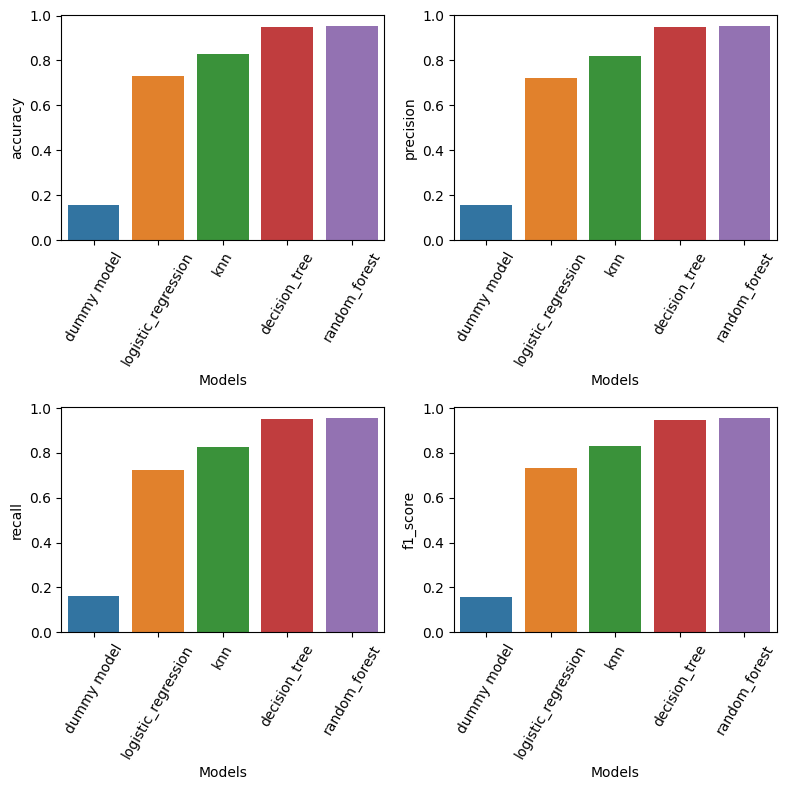

In [205]:
# plot the model scores
fig,ax = plt.subplots(nrows=2,ncols=2,figsize = (8,8))
sns.barplot(ax=ax[0,0],data=scores_df, x=scores_df.index, y="accuracy", hue=scores_df.index)
ax[0,0].set_xlabel("Models")
ax[0,0].set_xticks(scores_df.index)
ax[0,0].set_xticklabels(scores_df.index, rotation=60)

sns.barplot(ax=ax[0,1],data=scores_df, x=scores_df.index, y="precision",hue=scores_df.index)
ax[0,1].set_xlabel("Models")
ax[0,1].set_xticks(scores_df.index)
ax[0,1].set_xticklabels(scores_df.index, rotation=60)
# plt.tight_layout()
# plt.show()

sns.barplot(ax=ax[1,0],data=scores_df, x=scores_df.index, y="recall",hue=scores_df.index)
ax[1,0].set_xlabel("Models")
ax[1,0].set_xticks(scores_df.index)
ax[1,0].set_xticklabels(scores_df.index, rotation=60)
# plt.tight_layout()
# plt.show()

sns.barplot(ax=ax[1,1],data=scores_df, x=scores_df.index, y="f1_score",hue=scores_df.index)
ax[1,1].set_xlabel("Models")
ax[1,1].set_xticks(scores_df.index)
ax[1,1].set_xticklabels(scores_df.index, rotation=60)
plt.tight_layout()
plt.show()

Confusion matrix display

In [ ]:
# plot confusion matrix using sklearn's ConfusionMatrixDisplay module
ConfusionMatrixDisplay.from_predictions(target_test, predicted_test_rf, 
                                        display_labels=best_model_rf.classes_,
                                        colorbar=False, 
                                        cmap="Blues")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

Normal weight and overweight-i confused model

Classification report

In [ ]:
# report = classification_report(
#     target_test, 
#     predicted_test_rf, 
#     target_names=best_model_rf.classes_,
# )
# print(report)

Lets use the _learning Curve_ to check if the model would benefit from adding more training data. It also helps to check if model suffers from _variance error_ or _bias error_ 

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(
#     best_model_rf.best_estimator_,
#     scaled_features_train,
#     target_train,
#     train_sizes=np.linspace(0.1,1.0,100),
#     cv=stratified_cv,
#     scoring="f1_macro"
# )

In [ ]:
# display = LearningCurveDisplay(train_sizes=train_sizes,
#                                train_scores=train_scores, 
#                                test_scores=test_scores, 
#                                score_name="accuracy")
# display.plot()
# plt.show()

In [ ]:
LearningCurveDisplay.from_estimator(best_model_rf.best_estimator_, 
                                              scaled_features_train, 
                                              target_train,
                                              score_name="f1_macro")
# display.plot()
plt.show()

Train scores remains high, but test scores increases as the number as the training size increase. We see that the test scores starting to pleateau out but still there is some room for increasing score by adding more observation but not to great extent.

### Summary

The target variable in this study has multiple categories, therefore this study is a _multiple classification_ problem. We are evaluating the performance of four different model; Logistic Regression, K Nearest Neigbor (KNN), Decision Trees and Random Forest,  to predict the target. Nested cross validation technique was used to evaluate each model performance and gridsearch was used to select hyperparameters for each of the models. 

Model performace for each model was measured using accuracy, precision, recall and F1-score on the test set. From the table and Fig 8, we observe that _Random Forest_ was the best performing modle across all the metrics. Confusion matrix for the Random Forest shows that overall the model is performing very well on the test set. However we notice that some observations are incorrectly predicted such as over_weightI and Overweight II.  
A validation curve was used to check if addding more data observation will help in further increasing the performance of the model. It shows that the test score increases as the number of test instances increases and then starting to plateau at the end, which means that there will not be huge benefit of adding more data observations but there is some scope to increase performance by using more data.

#### References

Estimation of obesity levels based on eating habits and physical condition. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Gozukara Bag, H.G., Yagin, F.H., Gormez, Y., González, P.P., Colak, C., Gülü, M., Badicu, G., Ardigò, L.P. 2023. Estimation of Obesity Levels through the Proposed Predictive Approach Based on Physical Activity and Nutritional Habits. Diagnostics. 13(18), 2949. https://doi.org/10.3390/diagnostics13182949

Palechor, F.M., de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data Brief. 25, 104344. https://doi.org/10.1016/j.dib.2019.104344